# Import Packages

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Up Initial Parameters Here

In [2]:
#Set up initial parameters

S_0 = 100 #0
k_q = 0.5 #1
v_q = 0.063 #2
V_0 = 0.05 #3
sigma_v = 0.38 #4
rho = -0.321 #5
rf = 0.05 #6
delta_t = 1/252 #7
n_years = 2 #8

strike_price = 110 #9

num_simulations = 5000 #10

# Simulate Stock Prices and Volatilities

In [3]:
#Simulation
# set random seed
np.random.seed(1)

V_matrix = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix.iloc[0,i] = V_0
    S_matrix.iloc[0,i] = S_0


dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix.iloc[k,i] = S_matrix.iloc[k-1,i] + rf*S_matrix.iloc[k-1,i]*delta_t + np.sqrt(V_matrix.iloc[k-1, i])*S_matrix.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix.iloc[k,i] = V_matrix.iloc[k-1,i] + k_q*(v_q - V_matrix.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix.iloc[k-1,i])*dW1.iloc[k,i] 
        
        if S_matrix.iloc[k,i] < 0:
            S_matrix.iloc[k,i] = 0
        elif V_matrix.iloc[k,i] < 0:
            V_matrix.iloc[k,i] = 0

In [4]:
S_matrix

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.469270,101.222980,99.568334,100.649833,98.689834,102.558582,99.858968,99.644307,100.554412,98.604357,...,100.592775,100.189378,102.377862,97.780538,98.457176,97.941034,100.844816,99.624100,99.394518,101.394626
2,97.216198,102.947157,99.042315,102.031875,99.545229,102.496993,102.312476,97.367267,100.672893,98.820850,...,98.639438,97.359295,104.038888,97.052394,99.630603,98.189668,100.763100,101.122644,96.760397,102.166440
3,93.684660,100.846766,95.296712,104.397507,98.778235,101.302690,102.716031,97.103615,99.648623,99.166292,...,99.230023,98.535346,103.325417,98.119297,98.200908,99.446862,101.672840,104.033268,97.727712,103.044461
4,91.842709,103.067765,95.130369,104.460254,99.195153,100.906750,104.501353,98.237928,100.165115,98.947938,...,103.690421,96.963084,101.217923,101.402556,96.657843,98.393548,100.188418,103.699849,99.409215,103.905007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,133.802691,101.868957,105.021241,156.378048,166.248418,23.613655,66.130902,113.233557,163.397672,102.505520,...,93.604152,124.573847,106.655361,104.944596,101.602526,93.023970,117.237648,133.093636,121.088578,133.870897
500,133.008359,104.117155,104.818269,157.420737,162.843034,23.610988,67.034877,113.253774,163.883672,102.773538,...,94.471730,124.611142,109.585119,105.084129,102.683396,94.157662,116.248818,134.616282,121.150362,136.928043
501,126.628222,104.573614,104.567250,158.911996,165.755560,23.627672,67.003885,113.287878,164.015725,103.485831,...,97.065639,124.667250,107.858059,105.400938,103.403525,95.650559,115.697831,135.071109,121.312033,135.523711
502,125.389491,103.084419,103.957603,162.471426,161.570120,23.328130,65.572578,114.130820,164.041039,102.564861,...,97.718675,124.803443,107.691421,105.433937,103.623928,96.273583,113.379156,133.010298,121.336102,144.049162


In [5]:
V_matrix

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
1,0.058720,0.045397,0.058039,0.055295,0.052424,0.045762,0.047324,0.051424,0.050015,0.054091,...,0.051453,0.056883,0.047570,0.054506,0.048463,0.044656,0.055199,0.046916,0.047403,0.041512
2,0.055665,0.048296,0.059886,0.053625,0.044934,0.041233,0.045019,0.060236,0.045061,0.040457,...,0.062318,0.056518,0.049377,0.044051,0.041500,0.044597,0.055855,0.044042,0.050357,0.037083
3,0.060567,0.051734,0.068541,0.064069,0.045703,0.049452,0.043058,0.061648,0.041676,0.040653,...,0.067676,0.049270,0.047933,0.047874,0.036869,0.038716,0.055014,0.031876,0.048471,0.037423
4,0.070851,0.044083,0.065191,0.068747,0.041066,0.041610,0.036642,0.058030,0.044913,0.041192,...,0.060047,0.057078,0.049214,0.048301,0.041716,0.043376,0.065365,0.030671,0.048853,0.033514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.112274,0.080016,0.001985,0.041611,0.126786,0.021470,0.025504,0.010915,0.028625,0.064505,...,0.037620,0.000058,0.087129,0.000368,0.012172,0.061328,0.026142,0.029128,0.000176,0.082608
500,0.115015,0.066237,0.003677,0.045063,0.124385,0.016856,0.024536,0.008465,0.020421,0.058055,...,0.039303,0.000319,0.089284,0.000494,0.013460,0.063941,0.016767,0.024057,0.000281,0.086119
501,0.113667,0.064049,0.005203,0.054000,0.119008,0.017818,0.026183,0.008004,0.018780,0.056674,...,0.045760,0.000246,0.090725,0.000139,0.015427,0.059507,0.020875,0.029002,0.000000,0.084484
502,0.117667,0.067084,0.004256,0.046203,0.122882,0.020318,0.021601,0.006743,0.018335,0.061668,...,0.048994,0.000147,0.087613,0.000319,0.016095,0.059173,0.023375,0.024459,0.000125,0.082586


# Calculate the Option Price

In [6]:
payoff_list = []
for column in S_matrix.columns:
    avg_price = S_matrix[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)

price = sum(payoff_list)/len(payoff_list)

In [7]:
price

4.996103875456643

# Plot Simulated Stock Price Paths

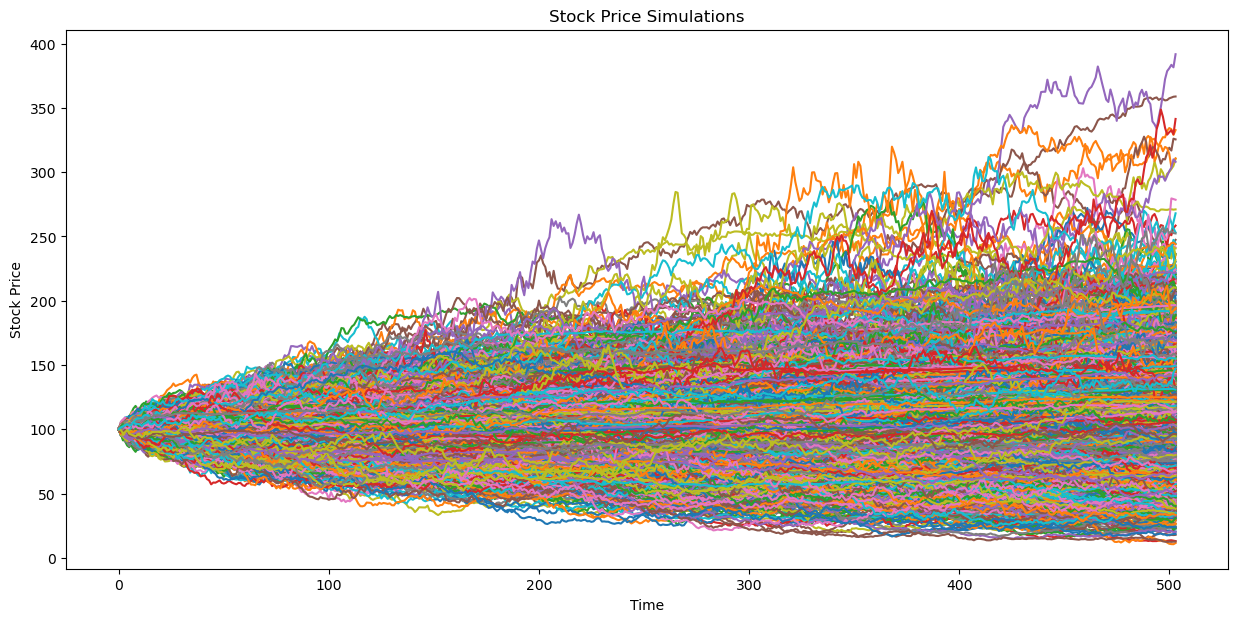

In [8]:
#Plot the paths

time = np.arange(int(delta_t**-1*n_years))

#Part 1: Stock Price
plt.figure(figsize=(15,7))
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulations")
plt.plot(time, S_matrix);


# ...and Variance

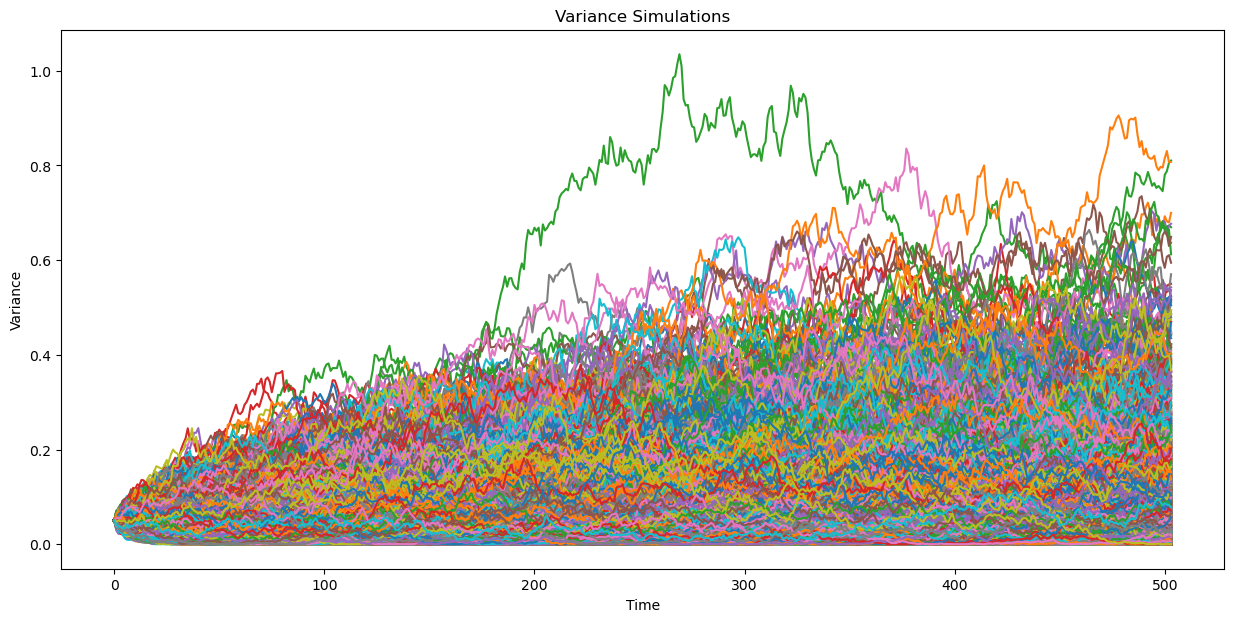

In [9]:
plt.figure(figsize=(15,7))
plt.title("Variance Simulations")
plt.xlabel("Time")
plt.ylabel("Variance")
plt.plot(time, V_matrix);

# Calculate Option Greeks Using 2000 Simulations

In [10]:
#Sensitivity
np.random.seed(1)

h = 1
num_simulations = 2000

# V-h

    
V_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix_low.iloc[0,i] = V_0
    S_matrix_low.iloc[0,i] = S_0 - h
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
  
dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_low.iloc[k,i] = S_matrix_low.iloc[k-1,i] + rf*S_matrix_low.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_low.iloc[k-1, i])*S_matrix_low.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_low.iloc[k,i] = V_matrix_low.iloc[k-1,i] + k_q*(v_q - V_matrix_low.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_low.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_low.iloc[k,i] < 0:
            S_matrix_low.iloc[k,i] = 0
        elif V_matrix_low.iloc[k,i] < 0:
            V_matrix_low.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_low.columns:
    avg_price = S_matrix_low[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)

price_low = sum(payoff_list)/len(payoff_list)
    

# V+h
    
V_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
    
for i in range(num_simulations):
    V_matrix_high.iloc[0,i] = V_0
    S_matrix_high.iloc[0,i] = S_0 + h
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
    

dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_high.iloc[k,i] = S_matrix_high.iloc[k-1,i] + rf*S_matrix_high.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_high.iloc[k-1, i])*S_matrix_high.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_high.iloc[k,i] = V_matrix_high.iloc[k-1,i] + k_q*(v_q - V_matrix_high.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_high.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_high.iloc[k,i] < 0:
            S_matrix_high.iloc[k,i] = 0
        elif V_matrix_high.iloc[k,i] < 0:
            V_matrix_high.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_high.columns:
    avg_price = S_matrix_high[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_high = sum(payoff_list)/len(payoff_list)


# Calculate the Option Delta

In [11]:
delta = (price_high-price_low)/(2*h)
delta

0.6969976616915319

# Run Simulations to Estimate the Option Vega

In [12]:
#Sensitivity

h = 0.01
num_simulations = 2000
np.random.seed(1)

# V-h

    
V_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_low = pd.DataFrame(np.zeros((252*2, num_simulations)))

for i in range(num_simulations):
    V_matrix_low.iloc[0,i] = V_0 - h
    S_matrix_low.iloc[0,i] = S_0
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
  
dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_low.iloc[k,i] = S_matrix_low.iloc[k-1,i] + rf*S_matrix_low.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_low.iloc[k-1, i])*S_matrix_low.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_low.iloc[k,i] = V_matrix_low.iloc[k-1,i] + k_q*(v_q - V_matrix_low.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_low.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_low.iloc[k,i] < 0:
            S_matrix_low.iloc[k,i] = 0
        elif V_matrix_low.iloc[k,i] < 0:
            V_matrix_low.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_low.columns:
    avg_price = S_matrix_low[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_low = sum(payoff_list)/len(payoff_list)
        
    

    

# V+h
    
V_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
S_matrix_high = pd.DataFrame(np.zeros((252*2, num_simulations)))
    
for i in range(num_simulations):
    V_matrix_high.iloc[0,i] = V_0 + h
    S_matrix_high.iloc[0,i] = S_0 
    
barrier = 0.7*S_0
barrier_sprt = pd.DataFrame((np.zeros((252*2, num_simulations))))
payoff = pd.DataFrame(np.zeros((1, num_simulations)))
    

dW1 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))
dW2 = pd.DataFrame(np.zeros((int(delta_t**-1*n_years), num_simulations)))

for i in range(num_simulations):
    for k in range(1, int(delta_t**-1*n_years)):
        dW1.iloc[k,i] = np.sqrt(delta_t)*np.random.randn() 
        dW2.iloc[k,i] = np.sqrt(delta_t)*np.random.randn()
        
        S_matrix_high.iloc[k,i] = S_matrix_high.iloc[k-1,i] + rf*S_matrix_high.iloc[k-1,i]*delta_t + np.sqrt(V_matrix_high.iloc[k-1, i])*S_matrix_high.iloc[k-1,i]*(rho*dW1.iloc[k,i] + np.sqrt(1-rho**2)*dW2.iloc[k,i])

        V_matrix_high.iloc[k,i] = V_matrix_high.iloc[k-1,i] + k_q*(v_q - V_matrix_high.iloc[k-1,i])*delta_t + sigma_v*np.sqrt(V_matrix_high.iloc[k,i])*dW1.iloc[k,i] 
        
        if S_matrix_high.iloc[k,i] < 0:
            S_matrix_high.iloc[k,i] = 0
        elif V_matrix_high.iloc[k,i] < 0:
            V_matrix_high.iloc[k,i] = 0
    
payoff_list = []
for column in S_matrix_high.columns:
    avg_price = S_matrix_high[column].mean()
    avg_payoff = max((avg_price - strike_price), 0)
    disc_payoff = avg_payoff*np.exp(-rf**n_years)
    payoff_list.append(disc_payoff)
    

price_high = sum(payoff_list)/len(payoff_list)

# The Following Block Returns the Vega

In [13]:
vega = (price_high-price_low)/(2*h)
vega

81.73602759680416

## 4. Build a summary Table

In [14]:
# create a new df with price and vega
df = pd.DataFrame({'price': [price], 'vega': [vega], 'delta': [delta]})
df

,price,vega,delta
0,4.996104,81.736028,0.696998
